In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key = "2cbdf1f583a779bea5b9cff0635994b7"

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
##PERFORM API CALLS
##Perform a weather check on each city using a series of successive API calls.
##Include a print log of each city as its being processed (with the city number and city name).

#API Keys

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Query URl
query_url = url + "appid=" + api_key + "&units" + units + "&q="

In [4]:
#Create lists to append the API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
#begin counter
record = 1
#Begin For Loop
for city in cities:
    try:
        weather_data = requests.get(query_url + city).json()
        city_name.append(weather_data['name'])
        cloudiness.append(weather_data['clouds']['all'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        humidity.append(weather_data['main']['humidity'])
        lat.append(weather_data['coord']['lat'])
        lng.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])
        wind_speed.append(weather_data['wind']['speed'])
        city_record = weather_data['name']
        print(f"Processing Record {record} | {city_record}")
        #increase counter by 1
        
        record = record + 1
    except:
        print("City not found | SKipping....")
    time.sleep(1.5)

Processing Record 1 | Punta Arenas
Processing Record 2 | Airai
Processing Record 3 | Lebu
City not found | SKipping....
Processing Record 4 | Kahului
Processing Record 5 | Vaini
Processing Record 6 | Pulandian
Processing Record 7 | Cherskiy
Processing Record 8 | Kimbe
Processing Record 9 | Laguna
Processing Record 10 | Vostok
Processing Record 11 | Hobart
Processing Record 12 | Segezha
Processing Record 13 | Puerto Ayora
Processing Record 14 | Norman Wells
Processing Record 15 | Leningradskiy
Processing Record 16 | Wanning
Processing Record 17 | Nikolskoye
Processing Record 18 | Port Alfred
Processing Record 19 | Ushuaia
Processing Record 20 | Yoichi
Processing Record 21 | Diamantino
Processing Record 22 | Tuktoyaktuk
Processing Record 23 | Hilo
Processing Record 24 | Tiznit
Processing Record 25 | Cabra
Processing Record 26 | Saint Andrews
Processing Record 27 | New Norfolk
Processing Record 28 | Tigre
City not found | SKipping....
City not found | SKipping....
Processing Record 29 | T

Processing Record 227 | Barugo
Processing Record 228 | Sobradinho
Processing Record 229 | Auki
Processing Record 230 | Salinopolis
Processing Record 231 | Rocha
Processing Record 232 | Erenhot
Processing Record 233 | Bella Union
Processing Record 234 | Saint-Augustin
Processing Record 235 | Esperance
Processing Record 236 | Campo Verde
Processing Record 237 | Pitlochry
Processing Record 238 | Shirpur
Processing Record 239 | Remanso
Processing Record 240 | Khatanga
Processing Record 241 | Makakilo City
Processing Record 242 | Oksfjord
Processing Record 243 | Vagur
Processing Record 244 | Sao Joao da Barra
Processing Record 245 | Sorong
City not found | SKipping....
Processing Record 246 | Pevek
Processing Record 247 | Mahibadhoo
Processing Record 248 | Talnakh
Processing Record 249 | La Brea
Processing Record 250 | Cervo
Processing Record 251 | Narsaq
Processing Record 252 | Coihaique
Processing Record 253 | Anapskaya
Processing Record 254 | Tiksi
Processing Record 255 | Haines Junction

Processing Record 449 | Trelleborg
Processing Record 450 | Dom Pedrito
Processing Record 451 | Bom Jesus do Itabapoana
City not found | SKipping....
Processing Record 452 | Lalin
Processing Record 453 | Mokhsogollokh
Processing Record 454 | Mayumba
Processing Record 455 | Pangnirtung
Processing Record 456 | Margherita
City not found | SKipping....
Processing Record 457 | Noyabrsk
Processing Record 458 | Ostrovnoy
Processing Record 459 | Umm Lajj
Processing Record 460 | Honiara
Processing Record 461 | Ahvaz
City not found | SKipping....
Processing Record 462 | Nuevo Progreso
Processing Record 463 | Malaut
Processing Record 464 | Kalmunai
Processing Record 465 | Bara
Processing Record 466 | Lebyazhye
City not found | SKipping....
Processing Record 467 | Sibu
Processing Record 468 | Otane
Processing Record 469 | Gambo
Processing Record 470 | Carauari
Processing Record 471 | Kloulklubed
Processing Record 472 | Jalpaiguri
Processing Record 473 | Timmins
Processing Record 474 | Coos Bay
Proc

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

In [7]:
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [8]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1572141319,84,-53.16,-70.91,278.15,8.20
1,Airai,0,TL,1572141321,36,-8.93,125.41,302.76,3.67
2,Lebu,11,ET,1572141323,57,8.96,38.73,284.15,1.31
3,Kahului,40,US,1572141179,48,20.89,-156.47,303.15,7.20
4,Vaini,75,IN,1572141327,94,15.34,74.49,293.15,4.10


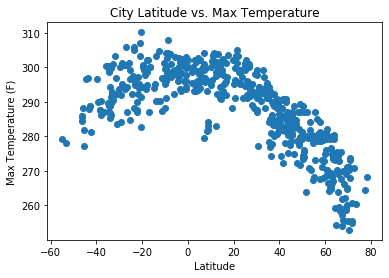

In [24]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

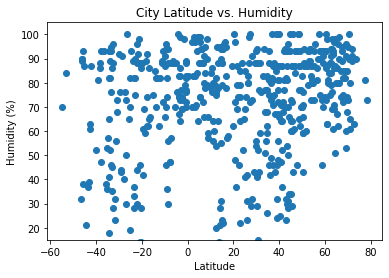

In [20]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.show()

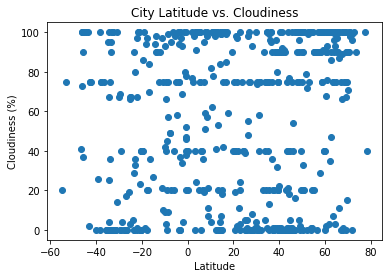

In [21]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

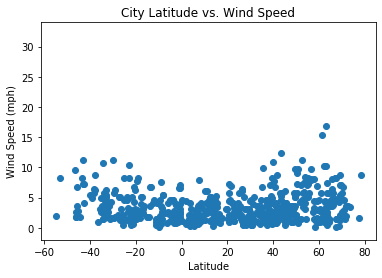

In [23]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.show()

In [ ]:
#CONCLUSIONS
#cities closer to the equator typically have higher temperatures
#there is not really a correlation between latitude and wind stream
#as of right now, october 26th, cities in the
#####northern hemisphere (above 0) have colder temperatures, while cities in the southern
#####hemisphere have higher temperatures